# Text Extraction from PDF files using OCR

## Importing Libraries and data

In [1]:
import pdf2image as pi
import pytesseract as pt
import numpy as np
import pandas as pd
import torch
import os
import cv2

from tqdm.notebook import tqdm_notebook

import matplotlib.pyplot as plt

In [2]:
poppler_path='C:\\Program Files\\poppler-21.03.0\\Library\\bin'

In [3]:
%%time

images = pi.convert_from_path('./India-Today.pdf', poppler_path=poppler_path)

Wall time: 18.8 s


In [4]:
# There are 66 pages in our pdf and hence we have 66 images
len(images)

66

## Looking at a few images

[19  5 32 30]


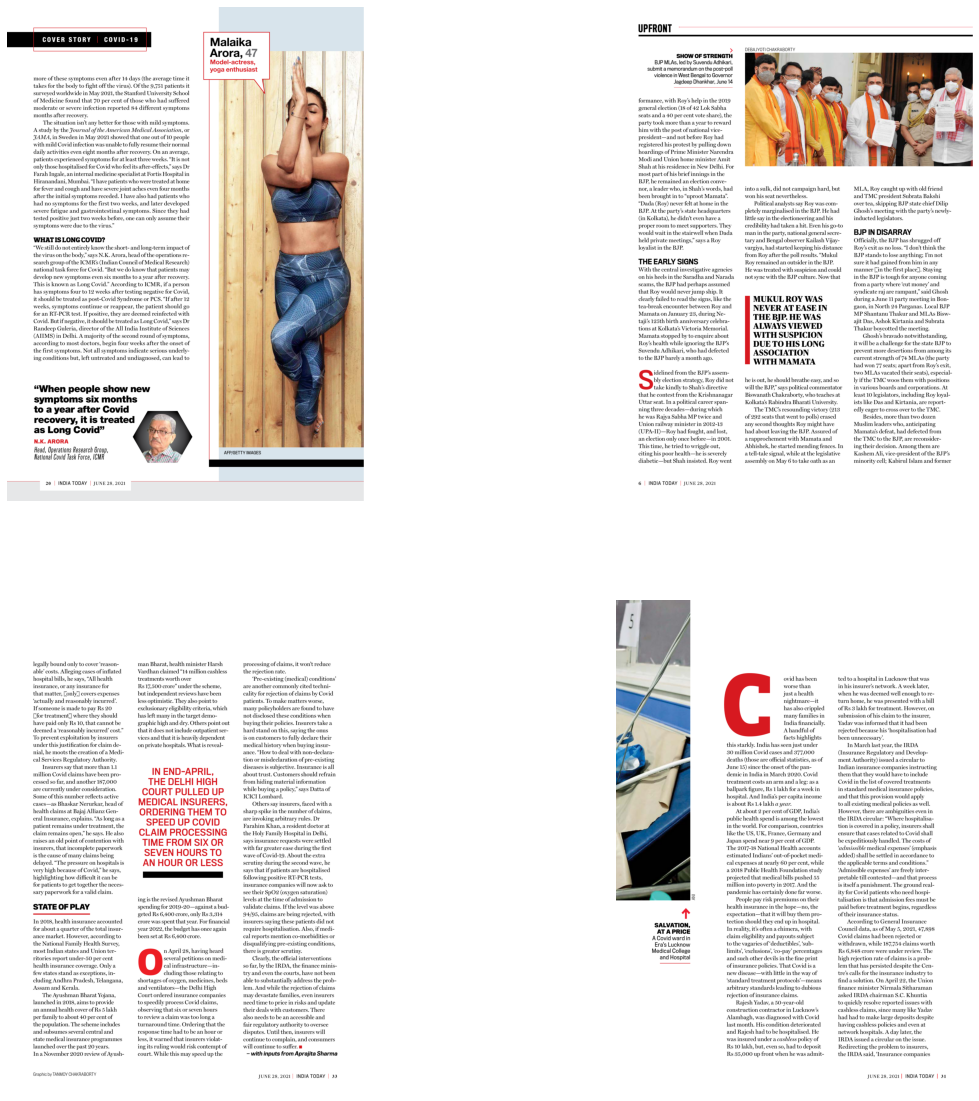

In [5]:
random_images = np.random.randint(0, len(images), size=4)
plt.figure(figsize=(20,20))
for idx, i in enumerate(random_images):
    image = images[i]
    plt.subplot(2, 2, idx+1)
    plt.imshow(image)
    plt.axis('off')

print(random_images)

## Making bounding box around text in image

In [6]:
pt.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

In [7]:
def get_text(image):
    image = np.array(image)
    output = pt.image_to_data(image, output_type='dict')
    text = []
    for i in range(0, len(output["text"])):

        x = output["left"][i]
        y = output["top"][i]
        w = output["width"][i]
        h = output["height"][i]

        if float(output['conf'][i]) > 80:
            text.append(output['text'][i])
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            
    text = ' '.join(text)
        
    return text, image

(-0.5, 1551.5, 2149.5, -0.5)

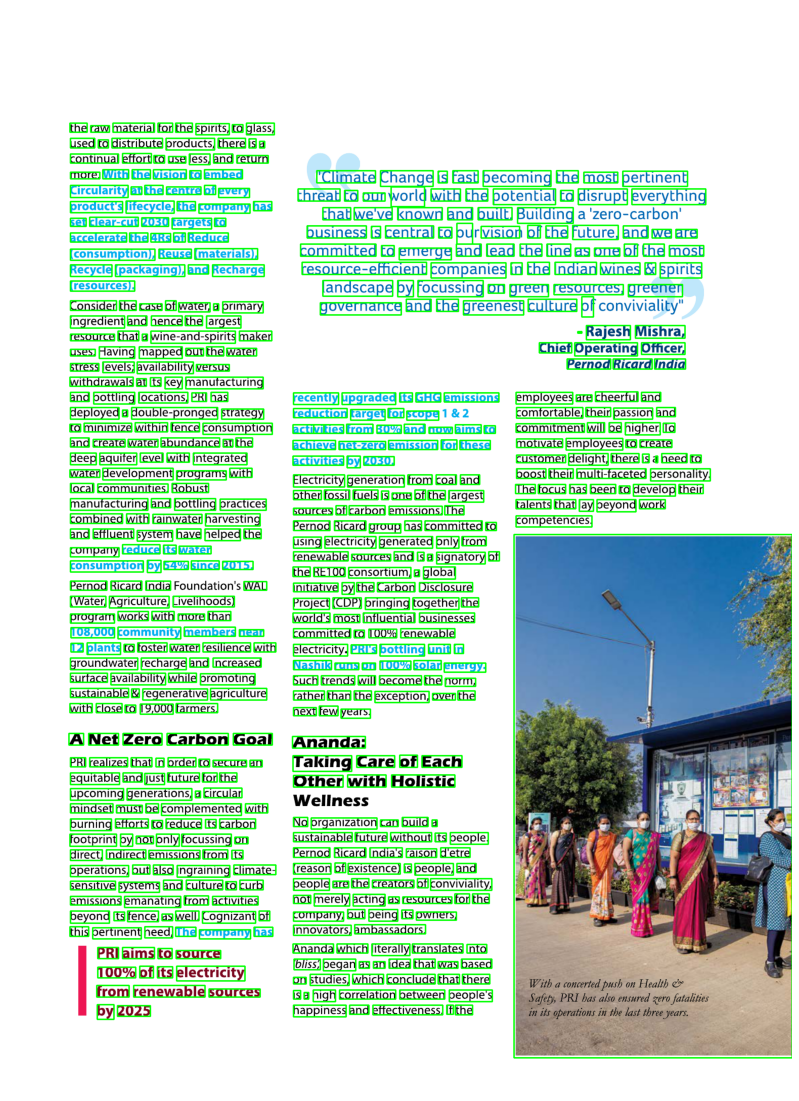

In [8]:
text, image = get_text(images[35])

plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')

## For whole magzine

In [9]:
%%time

texts = []
for image in images:
    text, image = get_text(image)
    texts.append(text)

Wall time: 2min 33s


In [12]:
texts

['  BUREAUCRACY: A UP: WOOING THE ARTILLERY: THE BATTLE MATTER OF PROPRIETY BRAHMIN VOTER FOR NEW GUNS www.indiatoday.in A JUNE 28, 2021   THE OF LONG COVID DOCTORS WARN OF A   WELL AFTER THE INFECTION ',
 "  TOP STORIES >       Narendra Modi Live: By Congress-mukt India we will fulfil Gandhi's dream PM Narandra wac in Sahha AVAILABLE ON |",
 'FROM THE EDITOR-IN-CHIEF   ew graphs have brought as much visual relief this year as the one illustrating India’s steep fall in Covid-19 cases. From a peak of over 400,000 cases a day in May, we are now down to less than 100,000 daily cases. The 60,471 cases reported on June 15 were the lowest daily count in 75 days. There has been an 85 per cent fall in the number of daily cases since the peak of 406,901 cases on May 7. India has seen more than 29 million cases since the start of the pandemic, of which 28 million people have recovered. Yet, as the first wave taught us, we must not let our guard down when it comes to Covid-19. This is particularl